In [57]:
# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
# import statement for autograd wrapped numpy
import autograd.numpy as np   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad

init_point = 2.0
iterations = 1000
alpha_1 = 1
alpha_2 = 1/10
alpha_3 = 1/100

g = lambda w: 1/50*(w**4 + w**2 + 10*w)

def grad_descent(func, alpha, max_iterations, w):
    gfunc = grad(func)
    
    weight_history = [w]
    cost_history = [func(w)]
    
    for k in range(max_iterations):
        grad_eval = gfunc(w)
        
        w = w - alpha*grad_eval
        
        weight_history.append(w)
        cost_history.append(func(w))
    return weight_history, cost_history

a1_wh, a1_ch = grad_descent(g, alpha_1, iterations, init_point)
a2_wh, a2_ch = grad_descent(g, alpha_2, iterations, init_point)
a3_wh, a3_ch = grad_descent(g, alpha_3, iterations, init_point)

<IPython.core.display.Javascript object>


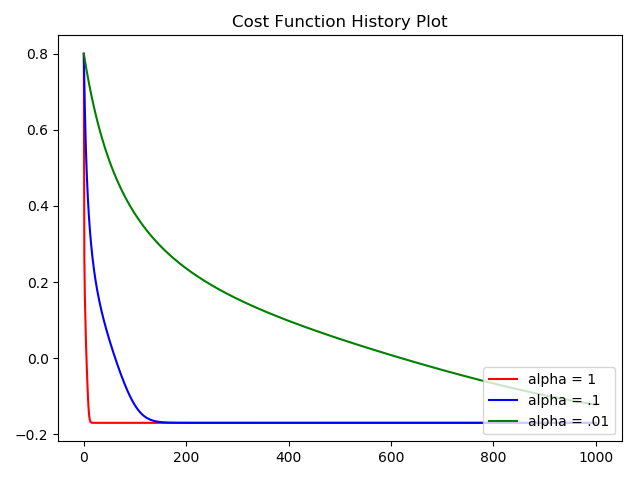

In [59]:
plt.plot(a1_ch, 'r-', label = 'alpha = 1')
plt.plot(a2_ch, 'b-', label = 'alpha = .1')
plt.plot(a3_ch, 'g-', label = 'alpha = .01')
plt.title("Cost Function History Plot")
plt.legend(loc="lower right")
plt.show()

A steplength of 1 works best for this function with a starting point of 2. It minimizes the function almost immediately. You can see in the graph above that with alpha = .1 the cost function is minimized around the 200th iteration and for alpha = .01 it doesn't converge in the 1000 iterations.

Calculating the derivative of the function by hand:
$$g(w) = \frac{1}{50}(w^4 + w^2 + 10*w)$$
$$\frac{1}{50}(w^4 + w^2 + 10w)$$
$$\frac{d}{dw} = \frac{1}{50}(4w^3 + 2w + 10)$$
$$\frac{d}{dw} = \frac{4w^3}{50} + \frac{2w}{50} + \frac{10}{50}$$
$$\frac{d}{dw} = \frac{2w^3}{25} + \frac{w}{25} + \frac{1}{5}$$
$$\frac{d}{dw} = \frac{2w^3}{25} + \frac{w}{25} + \frac{1}{5} = 0$$
$$\frac{d}{dw} = 2w^3 + w + 5 = 0$$

In [49]:
#checking hand calculation of derivative matches with output of grad_descent:
a1_wh[1000]

def deriv_of_func(w):
    return round((1/50)*(4*w**3 + 2*w+ 10),3)

round(deriv_of_func(a1_wh[1000]),2)

0.0

### Not sure but maybe the question was asking for me to use deriv_of_func in gradient_descent function instead of grad? Below I did that:

In [52]:
#Not sure but maybe the question was asking for me to use deriv_of_func in gradient_descent function instead of grad?
def grad_descent2(func, alpha, max_iterations, w):
#     gfunc = grad(func)
    
    weight_history = [w]
    cost_history = [func(w)]
    
    for k in range(max_iterations):
        grad_eval = deriv_of_func(w)
        
        w = w - alpha*grad_eval
        
        weight_history.append(w)
        cost_history.append(func(w))
    return weight_history, cost_history

a1_wh, a1_ch = grad_descent2(g, alpha_1, iterations, init_point)
a2_wh, a2_ch = grad_descent2(g, alpha_2, iterations, init_point)
a3_wh, a3_ch = grad_descent2(g, alpha_3, iterations, init_point)

<IPython.core.display.Javascript object>


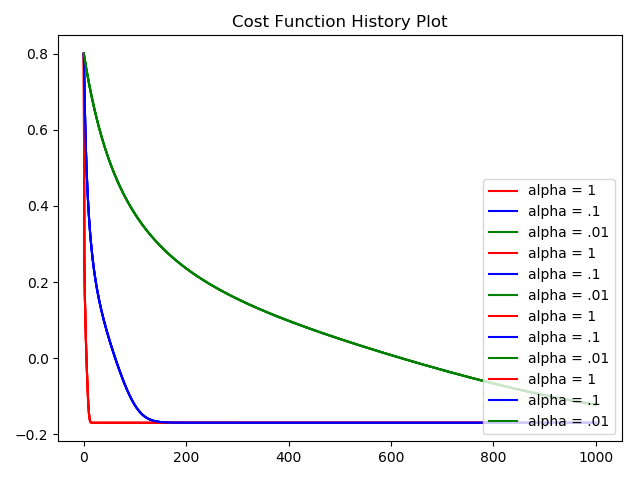

In [53]:
plt.figure()
plt.plot(a1_ch, 'r-', label = 'alpha = 1')
plt.plot(a2_ch, 'b-', label = 'alpha = .1')
plt.plot(a3_ch, 'g-', label = 'alpha = .01')
plt.title("Cost Function History Plot")
plt.legend(loc="lower right")
plt.show()

### alpha = 1 seems to minimize the function the fastest